In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn import preprocessing

In [11]:
df = pd.read_csv("dataset_mood_smartphone.csv")

In [12]:
# Create columns for variables that have a value
for var in df["variable"].unique():
    df['%s'%var] = np.where(df['variable'] == var, df['value'], np.NaN)

# Split the date-time in seperate columns, transform to a datetime format
df[['date', 'time']] = df['time'].str.split(' ', 1, expand=True)
df['time'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [13]:
# Pick one sample user
df1 = df[df['id'] == 'AS14.01']
df_avg = pd.DataFrame()

# Average over the day
take_mean = set(("mood", "activity", "circumplex.arousal", "circumplex.valence"))

# Total time everyday
take_sum = set(("screen", "appCat.builtin","appCat.communication","appCat.entertainment", 
                "appCat.finance", "appCat.game", "appCat.office", "appCat.other", "appCat.social",  
                "appCat.travel", "appCat.unknown", "appCat.utilities", "appCat.weather"))

# Amount of calls or texts a day
take_count = set(("call", "sms"))

for var in df["variable"].unique():
    df2 = df1[df1[var].notna()]
    if var in take_mean:
        df_mean = df2.groupby('date').mean()
        df_avg[var] = df_mean[var]
    if var in take_sum:
        df_sum = df2.groupby('date').mean()
        df_avg[var] = df_sum[var]
    if var in take_count:
        df_count = df2.groupby('date').count()
        df_avg[var] = df_count[var]


df_avg

,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
date,,,,,,,,,,,,,,,,,,,
2014-02-26,6.250000,-0.250000,0.750000,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-27,6.333333,0.000000,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-21,6.200000,0.200000,0.200000,0.134050,153.665872,6.0,NaN,14.269173,55.095526,53.024000,6.193000,NaN,57.40200,29.968875,75.141667,70.418846,NaN,23.029000,NaN
2014-03-22,6.400000,0.600000,0.500000,0.236880,47.613651,3.0,1.0,7.781160,51.697063,46.662000,7.025333,NaN,NaN,14.020429,36.636000,37.305000,NaN,39.207000,NaN
2014-03-23,6.800000,0.200000,0.800000,0.142741,67.067644,NaN,NaN,12.134396,53.442031,31.448667,10.850750,NaN,NaN,12.137167,50.046611,NaN,NaN,30.086000,30.386
2014-03-24,6.000000,0.800000,0.000000,0.078961,76.772199,10.0,NaN,4.982506,47.541687,122.121375,5.684333,NaN,3.01000,11.093000,74.968047,83.961000,NaN,89.366000,NaN
2014-03-25,6.750000,0.500000,0.500000,0.098374,169.097283,NaN,1.0,10.026874,69.437507,34.103000,10.763500,NaN,NaN,29.803167,68.552536,NaN,29.402875,22.289300,NaN
2014-03-26,6.600000,-0.200000,0.600000,0.101308,94.389661,NaN,NaN,8.460123,47.061534,130.068429,8.721833,NaN,NaN,16.249667,124.109703,NaN,NaN,33.365000,NaN
2014-03-27,7.000000,0.200000,0.800000,0.159511,129.201111,2.0,1.0,7.982643,43.353200,71.037667,14.073000,NaN,15.20425,9.755333,71.952385,23.657000,NaN,16.275364,NaN


In [14]:
df = df_avg.replace(np.nan, 0)

In [15]:
df = df.drop(['circumplex.arousal', 'circumplex.valence'], 1)
df

,mood,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
date,,,,,,,,,,,,,,,,,
2014-02-26,6.250000,0.000000,0.000000,1.0,2.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
2014-02-27,6.333333,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
2014-03-21,6.200000,0.134050,153.665872,6.0,0.0,14.269173,55.095526,53.024000,6.193000,0.0000,57.40200,29.968875,75.141667,70.418846,0.000000,23.029000,0.000
2014-03-22,6.400000,0.236880,47.613651,3.0,1.0,7.781160,51.697063,46.662000,7.025333,0.0000,0.00000,14.020429,36.636000,37.305000,0.000000,39.207000,0.000
2014-03-23,6.800000,0.142741,67.067644,0.0,0.0,12.134396,53.442031,31.448667,10.850750,0.0000,0.00000,12.137167,50.046611,0.000000,0.000000,30.086000,30.386
2014-03-24,6.000000,0.078961,76.772199,10.0,0.0,4.982506,47.541687,122.121375,5.684333,0.0000,3.01000,11.093000,74.968047,83.961000,0.000000,89.366000,0.000
2014-03-25,6.750000,0.098374,169.097283,0.0,1.0,10.026874,69.437507,34.103000,10.763500,0.0000,0.00000,29.803167,68.552536,0.000000,29.402875,22.289300,0.000
2014-03-26,6.600000,0.101308,94.389661,0.0,0.0,8.460123,47.061534,130.068429,8.721833,0.0000,0.00000,16.249667,124.109703,0.000000,0.000000,33.365000,0.000
2014-03-27,7.000000,0.159511,129.201111,2.0,1.0,7.982643,43.353200,71.037667,14.073000,0.0000,15.20425,9.755333,71.952385,23.657000,0.000000,16.275364,0.000


In [16]:
df= df.replace(0, 0.00000001)
df[['activity',
 'screen',
 'call',
 'sms',
 'appCat.builtin',
 'appCat.communication',
 'appCat.entertainment',
 'appCat.finance',
 'appCat.game',
 'appCat.office',
 'appCat.other',
 'appCat.social',
 'appCat.travel',
 'appCat.unknown',
 'appCat.utilities',
 'appCat.weather']] = df[['activity',
 'screen',
 'call',
 'sms',
 'appCat.builtin',
 'appCat.communication',
 'appCat.entertainment',
 'appCat.finance',
 'appCat.game',
 'appCat.office',
 'appCat.other',
 'appCat.social',
 'appCat.travel',
 'appCat.unknown',
 'appCat.utilities',
 'appCat.weather']].transform('sqrt')
df

,mood,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
date,,,,,,,,,,,,,,,,,
2014-02-26,6.250000,0.000100,0.000100,1.000000,1.414214,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.00010
2014-02-27,6.333333,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.00010
2014-03-21,6.200000,0.366129,12.396204,2.449490,0.000100,3.777456,7.422636,7.281758,2.488574,0.000100,7.576411,5.474384,8.668429,8.391594,0.000100,4.798854,0.00010
2014-03-22,6.400000,0.486703,6.900265,1.732051,1.000000,2.789473,7.190067,6.830959,2.650535,0.000100,0.000100,3.744386,6.052768,6.107782,0.000100,6.261549,0.00010
2014-03-23,6.800000,0.377811,8.189484,0.000100,0.000100,3.483446,7.310406,5.607911,3.294048,0.000100,0.000100,3.483844,7.074363,0.000100,0.000100,5.485071,5.51235
2014-03-24,6.000000,0.281000,8.761975,3.162278,0.000100,2.232153,6.895048,11.050854,2.384184,0.000100,1.734935,3.330616,8.658409,9.163024,0.000100,9.453359,0.00010
2014-03-25,6.750000,0.313646,13.003741,0.000100,1.000000,3.166524,8.332917,5.839777,3.280777,0.000100,0.000100,5.459228,8.279646,0.000100,5.422442,4.721155,0.00010
2014-03-26,6.600000,0.318290,9.715434,0.000100,0.000100,2.908629,6.860141,11.404755,2.953275,0.000100,0.000100,4.031088,11.140453,0.000100,0.000100,5.776244,0.00010
2014-03-27,7.000000,0.399388,11.366667,1.414214,1.000000,2.825357,6.584315,8.428385,3.751400,0.000100,3.899263,3.123353,8.482475,4.863846,0.000100,4.034274,0.00010


In [17]:
attributes = df.columns
attributes = attributes[1:]
attributes = list(attributes)
attributes

['activity',
 'screen',
 'call',
 'sms',
 'appCat.builtin',
 'appCat.communication',
 'appCat.entertainment',
 'appCat.finance',
 'appCat.game',
 'appCat.office',
 'appCat.other',
 'appCat.social',
 'appCat.travel',
 'appCat.unknown',
 'appCat.utilities',
 'appCat.weather']

In [18]:
""""
features = attributes
# Separating out the features
x = dfall.loc[:, features].values
# Separating out the target
y = dfall.loc[:,['mood']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))
dfPCA = pd.DataFrame(principalComponents)
pc1 = []
pc2 = []
#pc3 = []
#pc4 = []
for i in range(len(dfPCA)):
    pc1.append(dfPCA[0][i])
    pc2.append(dfPCA[1][i])
    #pc3.append(dfPCA[2][i])
    #pc4.append(dfPCA[3][i])
dfall['pc1'] = pc1
dfall['pc2'] = pc2
"""


'"\nfeatures = attributes\n# Separating out the features\nx = dfall.loc[:, features].values\n# Separating out the target\ny = dfall.loc[:,[\'mood\']].values\n# Standardizing the features\nx = StandardScaler().fit_transform(x)\npca = PCA(n_components=2)\nprincipalComponents = pca.fit_transform(x)\nprincipalDf = pd.DataFrame(data = principalComponents\n             , columns = [\'principal component 1\', \'principal component 2\'])\n\nprint(\'Variance of each component:\', pca.explained_variance_ratio_)\nprint(\'\n Total Variance Explained:\', round(sum(list(pca.explained_variance_ratio_))*100, 2))\ndfPCA = pd.DataFrame(principalComponents)\npc1 = []\npc2 = []\n#pc3 = []\n#pc4 = []\nfor i in range(len(dfPCA)):\n    pc1.append(dfPCA[0][i])\n    pc2.append(dfPCA[1][i])\n    #pc3.append(dfPCA[2][i])\n    #pc4.append(dfPCA[3][i])\ndfall[\'pc1\'] = pc1\ndfall[\'pc2\'] = pc2\n'

In [19]:
X = df[['activity',
 'screen',
 'appCat.builtin',
 'appCat.communication',
 'appCat.entertainment',
 'appCat.finance',
 'appCat.game',
 'appCat.office',
 'appCat.other',
 'appCat.social',
 'appCat.travel',
 'appCat.unknown',
 'appCat.utilities',
 'appCat.weather']]
y = df[['mood']]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [69]:
knn_model = KNeighborsRegressor(n_neighbors=12)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=12)

In [70]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.5425886797492726

In [71]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.508720822259125

In [72]:
print(explained_variance_score(y_test, test_preds))

-0.07295918661500966


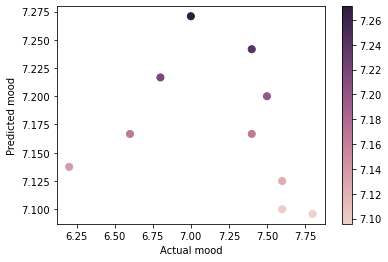

In [73]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(y_test, test_preds, c=test_preds, s=50, cmap=cmap)
ax.set_xlabel('Actual mood')
ax.set_ylabel('Predicted mood')
f.colorbar(points)
plt.show()

In [74]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

C:\Users\ysijp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ysijp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ysijp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\ysijp\anaconda3\lib\site-packages\sklearn\base.py", line 553, in score
    y_pred = self.predict(X)
  File "C:\Users\ysijp\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py", line 208, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\ysijp\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 680, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples,

C:\Users\ysijp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ysijp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ysijp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\ysijp\anaconda3\lib\site-packages\sklearn\base.py", line 553, in score
    y_pred = self.predict(X)
  File "C:\Users\ysijp\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py", line 208, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\ysijp\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 680, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples,

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [75]:
gridsearch.best_params_

{'n_neighbors': 12}